In [994]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# from plotly.subplots import make_subplots



<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#008080; border-radius:10px; padding:2px; font-size:18px; width:300px; color:white'  >
            <font> Import data
            </font>
        </div>
    </h1>
</div>

In [995]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("train -> rows = {} and columns = {}".format(train.shape[0], train.shape[1]))
print("test -> rows = {} and columns = {}".format(test.shape[0], test.shape[1]))

train -> rows = 891 and columns = 12
test -> rows = 418 and columns = 11


In [996]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [997]:
#chech null values
print(train.isnull().sum(), '\n\n', test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Text(0.5, 1.0, 'test')

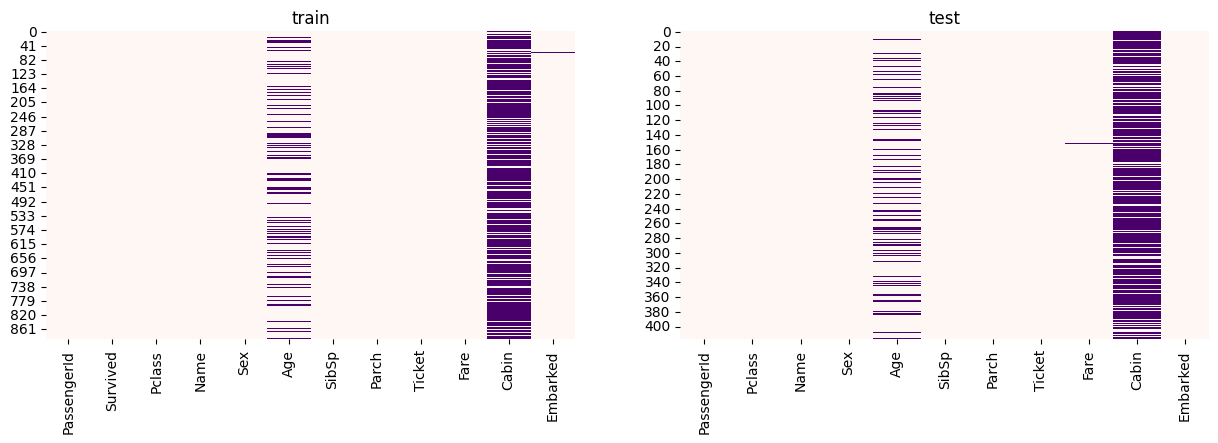

In [998]:
#Use Heatmap for visualizing the missing data
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.heatmap(train.isnull(),cmap='RdPu', cbar=False, ax=ax[0])
ax[0].set_title('train')
sns.heatmap(test.isnull(),cmap='RdPu', cbar=False, ax=ax[1])
ax[1].set_title('test')

In [999]:
#show missing values for train dataset
dataset = [train, test]
def missing_table(df):
    table = pd.DataFrame()
    table['Column'] = df.columns
    table['Missing'] = [df[col].isnull().sum() for col in df.columns]
    table['Missing_percentage'] = [round(df[col].isnull().sum()/len(df[col])*100,2) for col in df.columns]
    return table

for data in dataset:
    print(missing_table(data),'\n')



         Column  Missing  Missing_percentage
0   PassengerId        0                0.00
1      Survived        0                0.00
2        Pclass        0                0.00
3          Name        0                0.00
4           Sex        0                0.00
5           Age      177               19.87
6         SibSp        0                0.00
7         Parch        0                0.00
8        Ticket        0                0.00
9          Fare        0                0.00
10        Cabin      687               77.10
11     Embarked        2                0.22 

         Column  Missing  Missing_percentage
0   PassengerId        0                0.00
1        Pclass        0                0.00
2          Name        0                0.00
3           Sex        0                0.00
4           Age       86               20.57
5         SibSp        0                0.00
6         Parch        0                0.00
7        Ticket        0                0.00
8       

'Cabin' column has more than 70% of null value. So, we will remove that column 


In [1000]:
# print(len(train.columns))
train.drop(columns=['Cabin'], inplace=True, axis=1)
test.drop(columns=['Cabin'], inplace=True, axis=1)


In [1001]:
dataset = [train, test]
for data in dataset:
    data.Embarked.fillna('S', inplace=True)

train.Embarked.value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [1002]:
test.Fare.isnull().sum()

1

In [1003]:
#fill null values in 'Fare' with mean
def fill_fare(fare):
    median = test['Fare'].median()
    if np.isnan(fare):
        return median
    else:
        return fare
test['Fare'] = test.apply(lambda x : fill_fare(x['Fare']), axis=1)
test.Fare.isnull().sum()

0

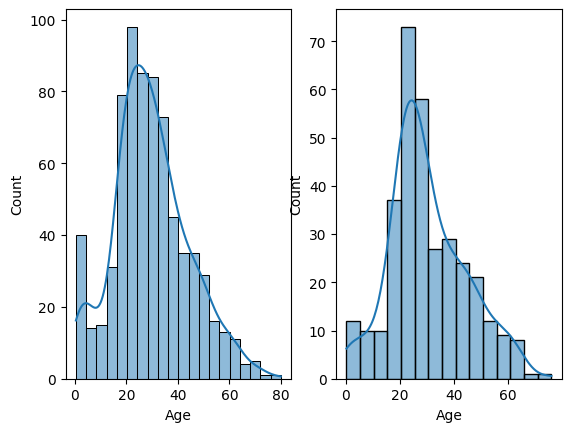

In [1004]:
plt.subplot(1,2,1)
sns.histplot(train.Age, kde=True)
plt.subplot(1,2,2)
sns.histplot(test.Age, kde=True)

plt.show()

In [1005]:
#fill null values in 'Age' using median
dataset = [train, test]
for data in dataset:  
    data.Age.fillna(data.Age.median(), inplace=True)

In [1006]:
train.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [1007]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1008]:
# #map 'male' and 'female' by 0 and 1
# dataset = [train, test]
# for data in dataset:
#     data.Sex = data.Sex.map({
#         'male':0, 'female':1
#     })

In [1009]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

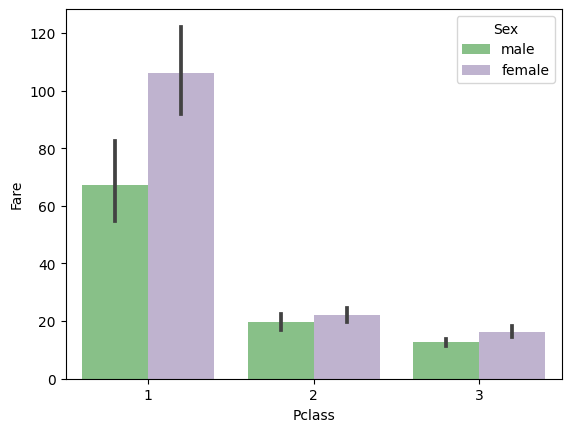

In [1010]:
sns.barplot(data = train, x='Pclass',y='Fare', hue='Sex', palette='Accent')

In [1011]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

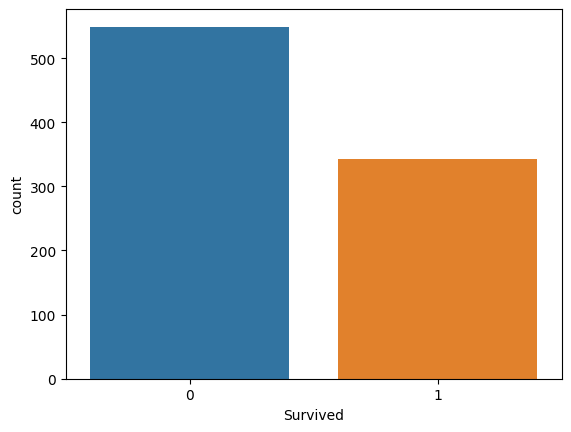

In [1012]:
sns.countplot(data = train, x='Survived')

<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#008080; border-radius:10px; padding:2px; font-size:18px; width:300px; color:white'  >
            <font> One-Hot Encoding
            </font>
        </div>
    </h1>
</div>

In [1013]:
#Merge both train and test data into a single dataframe
df = pd.concat([train,test], axis=0).reset_index(drop=True)
print(df.shape)
df.head(3)



(1309, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [1014]:
df =pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [1015]:
print(df.shape)
df.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#008080; border-radius:10px; padding:2px; font-size:18px; width:300px; color:white'  >
            <font> Model Training
            </font>
        </div>
    </h1>
</div>

In [1050]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [1051]:
train_df = (df.iloc[0:891]).copy()
X = train_df.drop(columns=['Name', 'Ticket']).copy()
y = X.pop('Survived')
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [1052]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [1053]:
# test_df = (df.iloc[891:1309]).copy()
# X_test = test_df.drop(columns=['Name', 'Ticket', 'Survived']).copy()
# print(X_test.shape)
# X_test.head()

In [1054]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#008080; border-radius:10px; padding:2px; font-size:18px; width:300px; color:white'  >
            <font> Naive Bayes
            </font>
        </div>
    </h1>
</div>

In [1060]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1061]:
print(classification_report(y_test, y_pred))
accuracy_score(y_pred, y_test)

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       103
         1.0       0.83      0.72      0.77        76

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



0.8212290502793296

In [1030]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
